# Projet personnel sur la snaté mentale des étudiants

### Import & read_csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('mental_h.csv')

## Modifications

Colonnes indiquant le mal-être psychique, qui combine l'anxiété, la dépression et le sentiment de solitude. 

In [3]:
df["mental_ill"] = ((df["anxiety"]+df["depression"]+ df["isolation"])/3)

Pourquoi avoir groupé ces indicateurs ? On peut voir qu'is sont corrélés entre eux :

In [27]:
selected_columns = ['anxiety', 'depression', 'isolation', 'future_insecurity', 'mental_ill']  # Remplacez par vos colonnes
subset_df = df[selected_columns]

<Axes: >

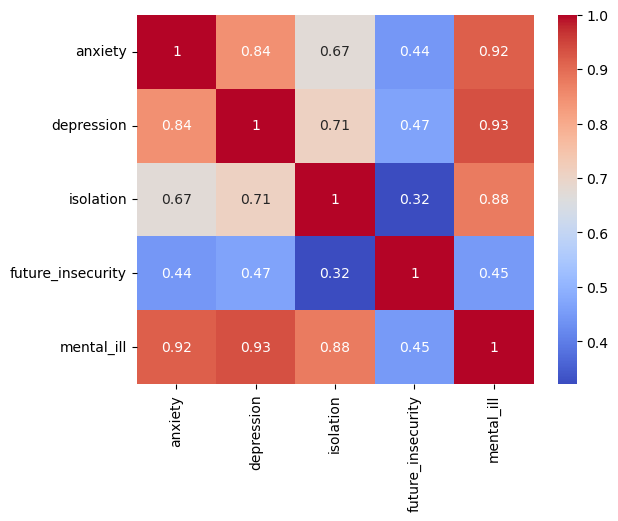

In [28]:
sns.heatmap(subset_df.corr(), cmap = 'coolwarm', annot = True)

In [ ]:
fig = px.density_heatmap(df, x="anxiety", y="depression", z = 'mental_ill', histfunc="count", text_auto = ".2s")
fig.update_layout(
    width=800,  # largeur 
    height=600  # hauteur
)
fig.show()

In [34]:
fig = px.density_heatmap(df, x="anxiety", y="depression", histfunc="avg", z="mental_ill", text_auto = ".2s")
fig.update_layout(
    width=800,  # largeur 
    height=600  # hauteur
)
fig.show()

## Facteurs démographiques

### Genre & âge

Niveau de mal-être en fonction du genre:

[Text(0, 0, '3.51389'), Text(0, 0, '3.1164')]

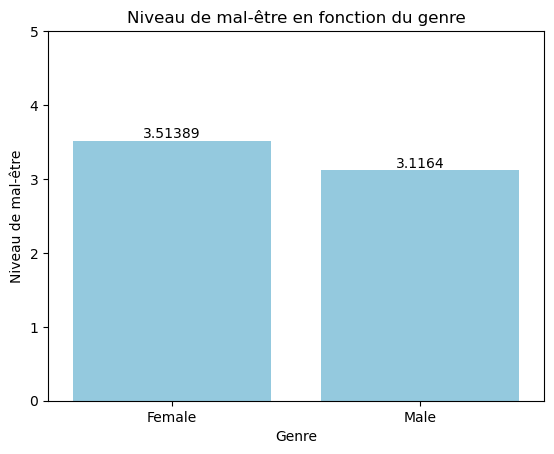

In [39]:
var = df.groupby("gender")['mental_ill'].mean()
x = var.index
y = var.values
ax = sns.barplot(x=x, y=y, color = "skyblue")
plt.title("Niveau de mal-être en fonction du genre")
plt.ylabel("Niveau de mal-être")
plt.xlabel("Genre")
plt.ylim(0,5)
ax.bar_label(ax.containers[0])

In [42]:
fig = px.bar(var, x=x, y= y, text_auto= '.2s',
             labels={"gender": "Genre", "y": "Niveau de mal-être"})
fig.update_layout(
    title = "Niveau de mal-être en fonction du genre",
    yaxis_range=[0, 5],
    width=800,
    height=600
)
fig.show()

En fonction du genre et de l'âge

(0.0, 5.2)

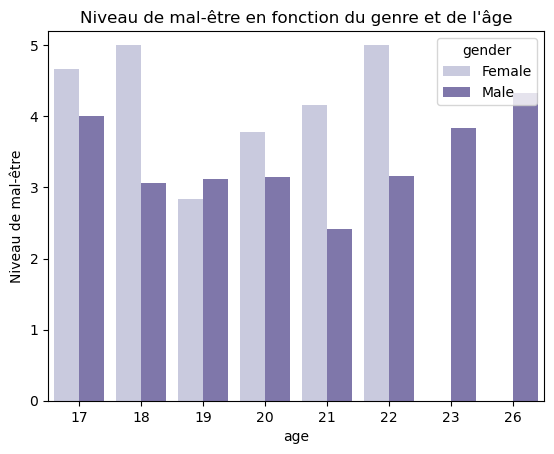

In [43]:
var = df.groupby(['age', 'gender'])['mental_ill'].mean().reset_index()

sns.barplot(data=var, x='age', y='mental_ill', hue='gender', palette='Purples')

plt.title("Niveau de mal-être en fonction du genre et de l'âge")
plt.ylabel("Niveau de mal-être")
plt.ylim(0, 5.2)

In [56]:
fig = px.histogram(df, x="age", y="mental_ill",
             color='gender', barmode='group',
             histfunc = 'avg', text_auto='.2s',
             labels= {"mental_ill":"Niveau de mal-être moyen", "age":"Age"})
fig.update_layout(
    title = "Niveau de mal-être en fonction du genre et de l'âge",
    yaxis_range=[0, 5.5],
    width=850,
    height=600)
fig.show()

Problème avec ce graphique qui prête à confusion (il y a moins de fille donc une valeur peu fiable)

### Préocupation financière

In [8]:
df_financial = df.pivot_table(index = 'financial_concerns', values = 'mental_ill' , aggfunc = ('mean','sum', 'count')).reset_index()
df_financial

,financial_concerns,count,mean,sum
0,1,13,2.666667,34.666667
1,2,9,2.851852,25.666667
2,3,22,3.212121,70.666667
3,4,17,2.647059,45.000000
4,5,26,4.025641,104.666667


In [9]:
fig = px.scatter(df_financial, x = 'mean', y = 'financial_concerns',
                  size = 'count',
                  trendline= 'ols',
                  title= "Mesure de l'anxiété en fonction de la préocupation financière")

fig.show()

### Impact des relations sociales

Est-ce que les relation sociales sont protectrices contre le mal-être ? 

Le mal-être en fonction de l'isolement social. Donc un violin pour les isolés un violin pour les non-isolés et on compare les valeurs.

En violin plot:

In [12]:
df['relationship_group'] = df['social_relationships'].apply(lambda x: 'socially_active' if x >= 3 else 'socially_isoled')

Text(0, 0.5, 'Score de santé mentale')

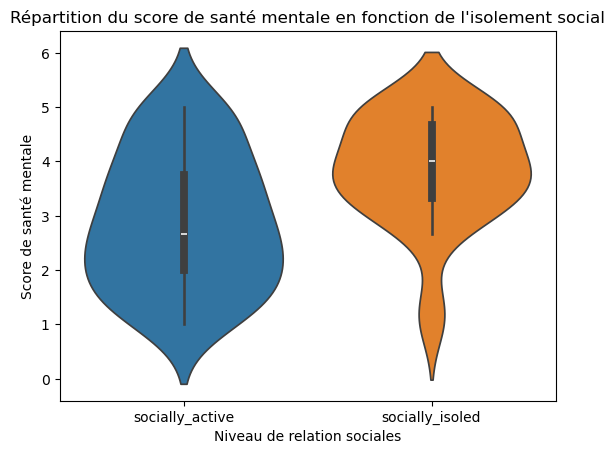

In [13]:
sns.violinplot(data = df, x="relationship_group", y="mental_ill", hue = "relationship_group")
plt.title("Répartition du score de santé mentale en fonction de l'isolement social")
plt.xlabel("Niveau de relation sociales")
plt.ylabel("Score de santé mentale")

In [60]:
fig = px.violin(df, y="mental_ill", x = "relationship_group",animation_frame = 'university', color = "relationship_group",
                 labels={"mental_ill": "Niveau de mal-être", "relationship_group": "Relations sociales"} )
fig.update_layout(
    title = "Répartition du score de santé mentale en fonction de l'isolement social",
    yaxis_range=[0, 5.5],
    width=800,
    height=450)
fig.show()

En box plot

Text(0.5, 1.0, "Niveau de mal-être en fonction de l'isolement social")

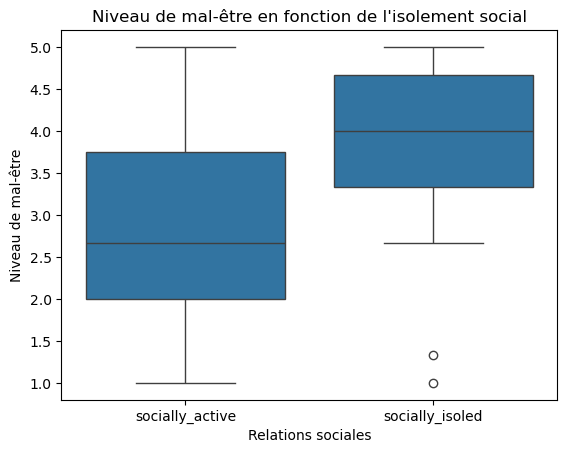

In [62]:
sns.boxplot(data = df, x="relationship_group", y="mental_ill")
plt.xlabel("Relations sociales")
plt.ylabel("Niveau de mal-être")
plt.title("Niveau de mal-être en fonction de l'isolement social")

In [64]:
fig = px.box(df, x="relationship_group", y="mental_ill", color = 'gender',
             labels={"mental-ill":"niveau de mal-être", "relationship_group":"Isolement social"})
fig.update_layout(
    title = "Niveau de mal-être en fonction de l'isolement social",
    yaxis_range=[0, 5.5],
    width=800,
    height=450)
fig.show()

## Stratégies de coping

Faire un uage de mot avec les activités de coping les plus populaires (https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud)

Essayer de transformer toutes les chapines de caractères des stratégies de coping en liste

In [19]:
def transfo_liste(chaine: str) -> list:
    liste_activites = []
    for activity in chaine.split(","):
        liste_activites.append(activity.strip())
    return liste_activites

df['stress_relief_activities'] = df['stress_relief_activities'].apply(transfo_liste)

In [20]:
df_exploded = df.explode('stress_relief_activities').reset_index()
df_exploded.head()

,index,Unnamed: 0.1,Unnamed: 0,gender,age,university,degree_level,degree_major,academic_year,cgpa,...,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities,mental_ill,relationship_group
0,0,0,0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,...,5,4,3,2,1,1,2,"[""['Religious Activities'""",1.333333,socially_active
1,0,0,0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,...,5,4,3,2,1,1,2,"""'Social Connections'""",1.333333,socially_active
2,0,0,0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,...,5,4,3,2,1,1,2,"""'Online Entertainment']""]",1.333333,socially_active
3,1,1,1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,...,4,1,3,3,3,3,4,"[""['Online Entertainment']""]",3.000000,socially_active
4,2,2,2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,...,5,3,4,2,3,3,1,"[""['Religious Activities'""",2.666667,socially_active


In [31]:
text = str(liste_activite)

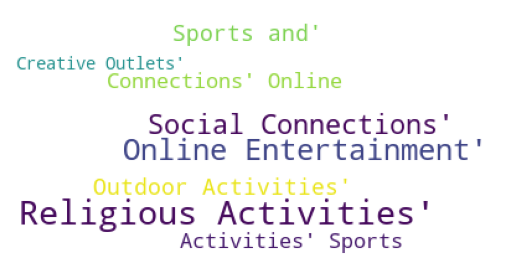

In [32]:
wordcloud = WordCloud(background_color = 'white').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### RegEx pour visualisation sur Looker studio

In [21]:
import re

In [22]:
correspondances = re.findall(r"(\w+\s\w+)", df_exploded["stress_relief_activities"][0])
correspondances

['Religious Activities']

In [23]:
def appliquer_regex(texte):
    correspondances = re.findall(r'\w+\s\w+', texte)
    # Joindre les correspondances en une chaîne (ou traiter selon votre besoin)
    return correspondances

df_exploded['stress_relief_activities'] = df_exploded['stress_relief_activities'].apply(appliquer_regex)


In [24]:
df_exploded

,index,Unnamed: 0.1,Unnamed: 0,gender,age,university,degree_level,degree_major,academic_year,cgpa,...,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities,mental_ill,relationship_group
0,0,0,0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,...,5,4,3,2,1,1,2,[Religious Activities],1.333333,socially_active
1,0,0,0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,...,5,4,3,2,1,1,2,[Social Connections],1.333333,socially_active
2,0,0,0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,...,5,4,3,2,1,1,2,[Online Entertainment],1.333333,socially_active
3,1,1,1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,...,4,1,3,3,3,3,4,[Online Entertainment],3.000000,socially_active
4,2,2,2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,...,5,3,4,2,3,3,1,[Religious Activities],2.666667,socially_active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,84,84,84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,...,2,4,3,1,2,1,1,[Online Entertainment],1.333333,socially_active
182,84,84,84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,...,2,4,3,1,2,1,1,[Outdoor Activities],1.333333,socially_active
183,84,84,84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,...,2,4,3,1,2,1,1,[],1.333333,socially_active
184,85,85,85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,...,3,3,2,3,4,4,5,[],3.666667,socially_isoled


In [25]:
#df_exploded.to_csv("df_ecploded.csv")

In [26]:
liste_activite = []
dico = {}

for i in df_exploded["stress_relief_activities"]:
    liste_activite.append(i)


for activite in liste_activite:
    if activite in dico:
        dico[activite] += 1 
    else:
        dico[activite] = 1 

print(dico)


TypeError: unhashable type: 'list'

## Activité sportive

Engagement dans des activités sportives et santé mentale

Text(0.5, 0, "Pratique d'activité physique")

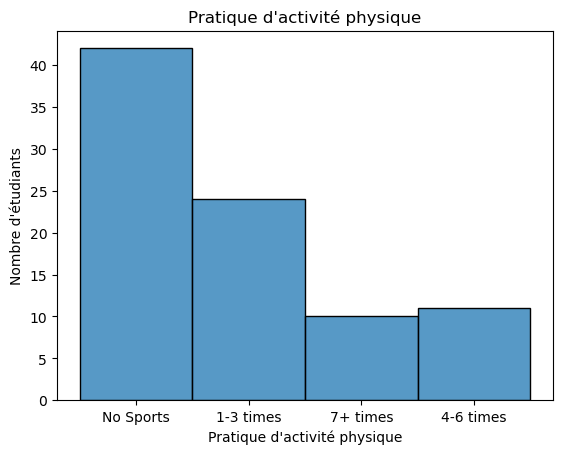

In [ ]:
sns.histplot(data = df, x = "sports_engagement")
plt.title("Pratique d'activité physique")
plt.ylabel("Nombre d'étudiants")
plt.xlabel("Pratique d'activité physique")

<Axes: xlabel='sports_engagement', ylabel='anxiety'>

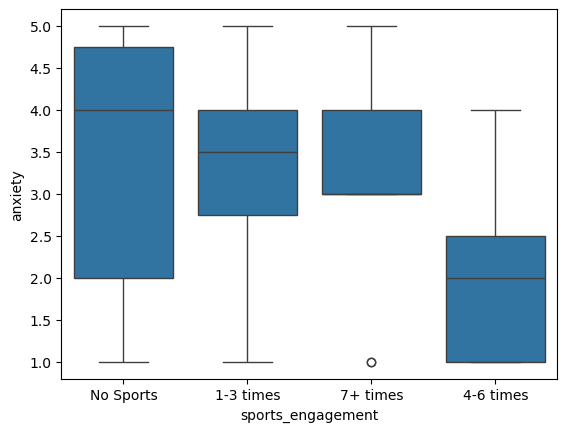

In [ ]:
#var = df.groupby("sports_engagement")['anxiety'].mean().sort_values(ascending = False)
sns.boxplot(data = df, x = 'sports_engagement', y= "anxiety")

In [ ]:
fig = px.violin(df, y="anxiety",box=True, color = 'sports_engagement', color_discrete_map={
                "No Sports": "red",
                "1-3 times": "orange",
                "4-6 times": "skyblue",
                "7+ times": "green"})
fig.show()

In [ ]:
df.loc[df["sports_engagement"] == "1-3 times", "anxiety"].median()

3.5

In [67]:

fig = px.scatter(df, y= "university" , x="anxiety", color="sports_engagement")
fig.update_traces(marker_size=10)
fig.update_layout(
    title = "Niveau d'anxiété en fonction de l'université et de la pratique d'activité physique",
    yaxis_range=[0, 5.5],
    width=800,
    height=450)
fig.show()